# Project 1

The purpose of this notebook to document preliminary analyses of DiscGolf to average income.

DiscGolf.csv was sourced from https://www.kaggle.com/datasets/lanekatris/pdga-united-states-disc-golf-courses

postcode_level_averages was sourced from https://www.kaggle.com/datasets/hamishgunasekara/average-income-per-zip-code-usa-2018

Data joined and saved to the Resources folder as "draft_dgolf_avincome.csv"

Data joined and saved to the Resources folder as "draft_dgolf_regionsummary.csv"

# Regions


In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
from scipy.stats import linregress
import scipy.stats as st
import datetime

In [2]:
#read dataframe with region info
draft_dgolf_regionsdf=pd.read_csv("Resources/draft_dgolf_regionsummary.csv")
draft_dgolf_regionsdf

,region,avg_income,holeCount,rating,n_courses,total_income
0,midwest,65654.105181,12.761250,3.305738,2689,1475678076
1,northeast,76394.097631,14.861514,3.416107,621,383306400
2,southeast,63356.492395,14.723153,3.454545,1611,1147142374
3,southwest,68164.100045,13.778075,3.336700,748,658702828
4,west,73987.123983,13.763851,3.344954,1101,880245720


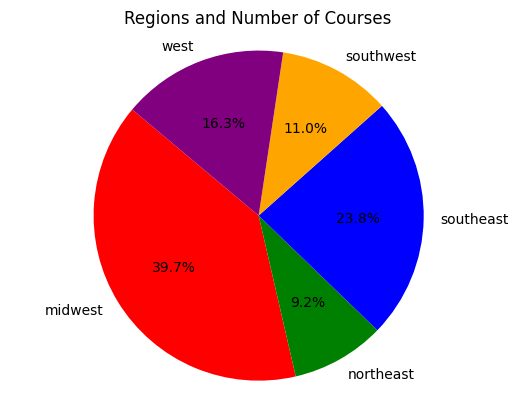

In [3]:
#Create a Pie Chart showing regions and number of courses
#label section of pie chart
labels=["midwest","northeast","southeast","southwest","west"]
#The value
size= [2689,621,1611,748,1101]
#setting colors of pie section
colors= ["Red","Green","Blue","Orange","Purple"]
#Created a pie chart with above values
plt.pie(size,labels=labels,colors=colors,autopct= "%1.1f%%",startangle=140)
#chart with equal axis
plt.axis("equal")
plt.title("Regions and Number of Courses")
#plt.show()
plt.savefig("Fig1.png")

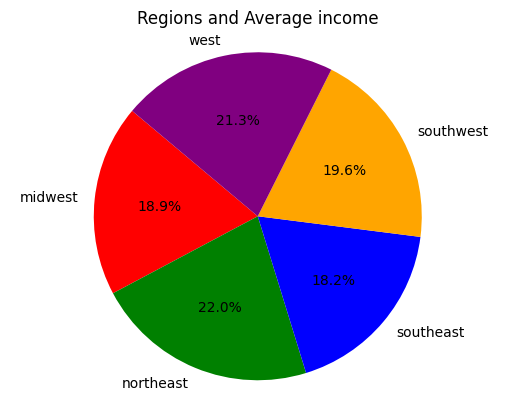

In [4]:
#Create a Pie Chart showing regions and number of courses
#label section of pie chart
labels=["midwest","northeast","southeast","southwest","west"]
#The value
size= [65654.105181,76394.097631,63356.492395,68164.100045,73987.123983]
#setting colors of pie section
colors= ["Red","Green","Blue","Orange","Purple"]
#Created a pie chart with above values
plt.pie(size,labels=labels,colors=colors,autopct= "%1.1f%%",startangle=140)
#chart with equal axis
plt.axis("equal")
plt.title("Regions and Average income")
#plt.show()
plt.savefig("Fig2.png")

# Midwest Regions

In [5]:
#read CSV and create Pandas DataFrames
draftdf = pd.DataFrame(pd.read_csv('Resources/draft_dgolf_avincome.csv'))

In [6]:
#check df
draftdf.head(2)

,Unnamed: 0,id,name,city,state_x,zip,holeCount,rating,latitude,longitude,Modified,Comments,state_y,zipcode,total_pop,total_income,country,avg_income
0,0,adventist-discovery-park,Adventist DISCovery Park,Opelika,Alabama,36804,3,NaN,32.645412,-85.378280,no,none,AL,36804,8240,417346,USA,50648.786408
1,1,agape-disc-golf-course,Agape Disc Golf Course,Scottsboro,Alabama,35769,9,NaN,34.622819,-86.080692,no,none,AL,35769,4170,316625,USA,75929.256595


In [7]:
#create summary by state:  of number of courses, total population, average income, course rating

subdraftdf = draftdf[['state_x','total_pop','avg_income','holeCount','rating']]
subdraftdf.head()
groupdf= subdraftdf.groupby(['state_x'])

ltotpop = [groupdf['total_pop'].sum()]
lavinc = [groupdf['avg_income'].mean()]
lavholes = [groupdf['holeCount'].mean()]
lavrating = [groupdf['rating'].mean()]
ltotcourses = [groupdf['holeCount'].count()]

totpop = pd.DataFrame(ltotpop).transpose()
avinc = pd.DataFrame(lavinc).transpose()
avholes = pd.DataFrame(lavholes).transpose()
avrating = pd.DataFrame(lavrating).transpose()
totcourses = pd.DataFrame(ltotcourses).transpose()


merge12 = pd.merge(totpop,avinc,on='state_x')
merge34 = pd.merge(avholes,avrating,on='state_x')
merge12nmore = pd.merge(merge12,totcourses,on='state_x').rename(columns = {"holeCount":"n_courses"})
merge12nmore
mergeall = pd.merge(merge12nmore,merge34,on='state_x')
mergeall


,total_pop,avg_income,n_courses,holeCount,rating
state_x,,,,,
Alabama,970510,60129.955845,121,15.438017,3.673913
Alaska,288780,74791.929935,31,13.451613,3.692308
Arizona,994820,63961.727080,71,13.887324,3.410256
Arkansas,886250,55399.123422,109,13.981651,3.789474
California,4093380,75793.617001,309,14.239482,3.280000
Colorado,1879100,80219.338127,176,13.886364,3.277778
Connecticut,330080,109678.582339,30,14.933333,3.611111
Delaware,178660,71301.197832,13,16.769231,3.000000
Florida,2229570,71147.145914,178,14.471910,3.603774


In [8]:
#Changing state_x from index to column
Mergeall2=mergeall.reset_index()
Mergeall2

,state_x,total_pop,avg_income,n_courses,holeCount,rating
0,Alabama,970510,60129.955845,121,15.438017,3.673913
1,Alaska,288780,74791.929935,31,13.451613,3.692308
2,Arizona,994820,63961.727080,71,13.887324,3.410256
3,Arkansas,886250,55399.123422,109,13.981651,3.789474
4,California,4093380,75793.617001,309,14.239482,3.280000
5,Colorado,1879100,80219.338127,176,13.886364,3.277778
6,Connecticut,330080,109678.582339,30,14.933333,3.611111
7,Delaware,178660,71301.197832,13,16.769231,3.000000
8,Florida,2229570,71147.145914,178,14.471910,3.603774
9,Georgia,1757390,63097.464684,138,14.862319,3.588235


# Midwest

In [9]:
#Get Midwest State only
Midwest = Mergeall2.loc[(Mergeall2["state_x"]=="Illinois")|(Mergeall2["state_x"]=="Indiana")|(Mergeall2["state_x"]=="Iowa")|(Mergeall2["state_x"]=="Kansas")|(Mergeall2["state_x"]=="Michigan")|(Mergeall2["state_x"]== "Minnesota")|(Mergeall2["state_x"]=="Missouri")|(Mergeall2["state_x"]=="Nebraska")|(Mergeall2["state_x"]=="North Dakota")|(Mergeall2["state_x"]=="Ohio")|(Mergeall2["state_x"]=="South Dakota")|(Mergeall2["state_x"]=="Wisconsin")]
Midwest    

,state_x,total_pop,avg_income,n_courses,holeCount,rating
12,Illinois,2729860,76785.410580,285,12.610526,3.084746
13,Indiana,1901680,61940.266185,185,14.821622,3.526316
14,Iowa,1346220,66076.191609,287,11.668990,3.221053
15,Kansas,1440530,59990.129837,260,12.207692,3.370370
21,Michigan,2712540,65157.653139,300,15.246667,3.713043
22,Minnesota,2365280,69054.948215,339,11.265487,3.093750
24,Missouri,1762390,58524.152347,185,13.875676,3.718310
26,Nebraska,514590,60920.892644,110,10.736364,2.907407
33,North Dakota,479370,72439.367773,60,11.016667,3.714286
34,Ohio,2999610,62402.605148,261,13.762452,3.062937


# Number of courses in Midwest

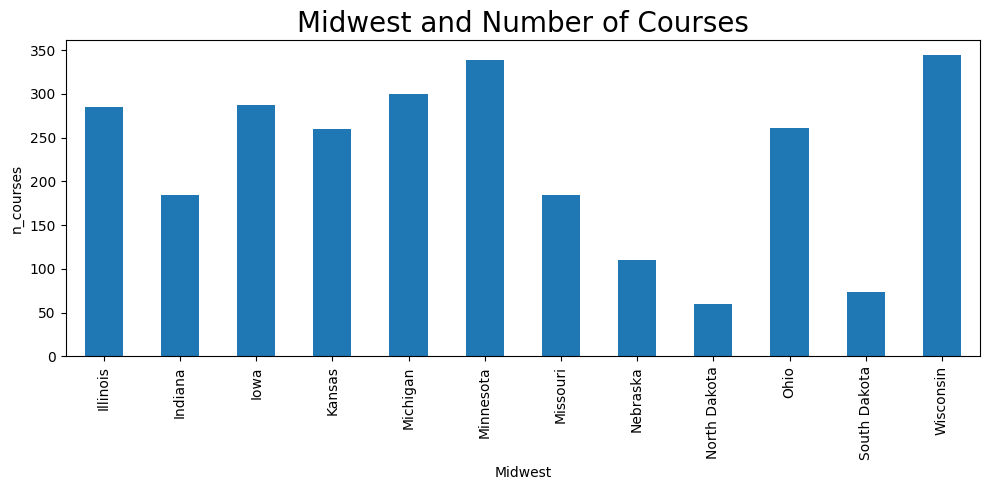

In [10]:
#Generate a bar plot showing Midwest and number of courses
#midwest_numb_courses =Midwest["state_x"].value_counts()
Midwest.plot(x="state_x",y="n_courses",kind="bar",figsize=(10,5),legend=None)
#midwest_numb_courses.plot.bar(rot=0, x=Midwest,y= "n_courses")
plt.xlabel("Midwest")
plt.xticks(rotation=90)
plt.ylabel("n_courses")
plt.title("Midwest and Number of Courses",fontsize = 20)
plt.tight_layout()
#plt.show()
plt.savefig("Fig3.png")


In [11]:
# Sort the highest and display the top 3 rows.
top_midwest=Midwest.sort_values("n_courses",ascending = False)
top_midwest.head(3)


,state_x,total_pop,avg_income,n_courses,holeCount,rating
48,Wisconsin,2489580,66144.270928,344,12.281977,3.550388
22,Minnesota,2365280,69054.948215,339,11.265487,3.093750
21,Michigan,2712540,65157.653139,300,15.246667,3.713043


In [12]:
#Filter top 3 state from Midwest
top = Midwest.loc[(Midwest["state_x"]=="Wisconsin")|(Midwest["state_x"]=="Minnesota")|(Midwest["state_x"]=="Michigan")]
top   

,state_x,total_pop,avg_income,n_courses,holeCount,rating
21,Michigan,2712540,65157.653139,300,15.246667,3.713043
22,Minnesota,2365280,69054.948215,339,11.265487,3.093750
48,Wisconsin,2489580,66144.270928,344,12.281977,3.550388


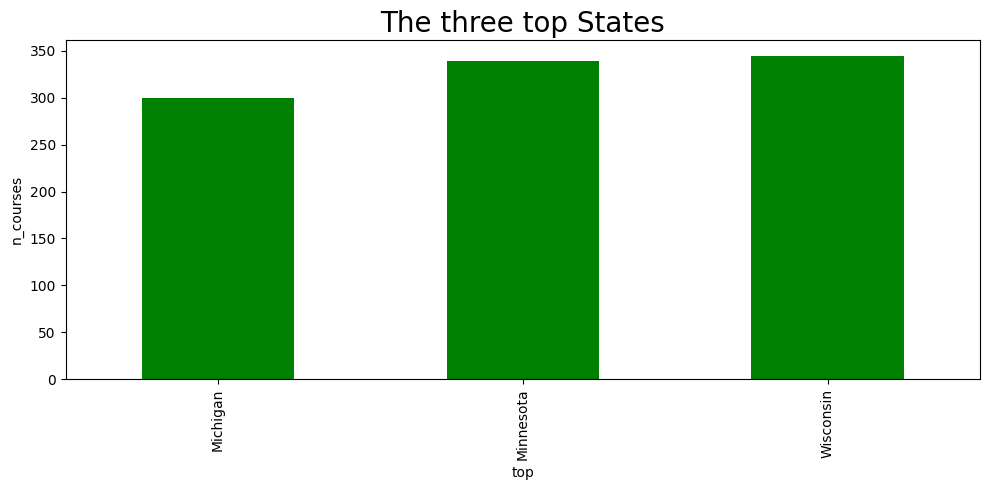

In [13]:
#Generate a bar plot showing Midwest and number of courses
#midwest_numb_courses =Midwest["state_x"].value_counts()
top.plot(x="state_x",y="n_courses",kind="bar", color="g",figsize=(10,5),legend=None)
#midwest_numb_courses.plot.bar(rot=0, x=Midwest,y= "n_courses")
plt.xlabel("top")
plt.xticks(rotation=90)
plt.ylabel("n_courses")
plt.title("The three top States",fontsize = 20)
plt.tight_layout()
#plt.show()
plt.savefig("Fig4.png")

In [14]:
# Sort the lowest and display the top 3 rows.
bottom_midwest=Midwest.sort_values("n_courses",ascending = True)
bottom_midwest.head(3)

,state_x,total_pop,avg_income,n_courses,holeCount,rating
33,North Dakota,479370,72439.367773,60,11.016667,3.714286
40,South Dakota,425440,64898.896932,74,11.391892,3.266667
26,Nebraska,514590,60920.892644,110,10.736364,2.907407


In [15]:
#Filter only bottom 3 states from Midwest
bottom =Midwest.loc[(Midwest["state_x"]=="North Dakota")|(Midwest["state_x"]=="South Dakota")|(Midwest["state_x"]=="Nebraska")]
bottom 

,state_x,total_pop,avg_income,n_courses,holeCount,rating
26,Nebraska,514590,60920.892644,110,10.736364,2.907407
33,North Dakota,479370,72439.367773,60,11.016667,3.714286
40,South Dakota,425440,64898.896932,74,11.391892,3.266667


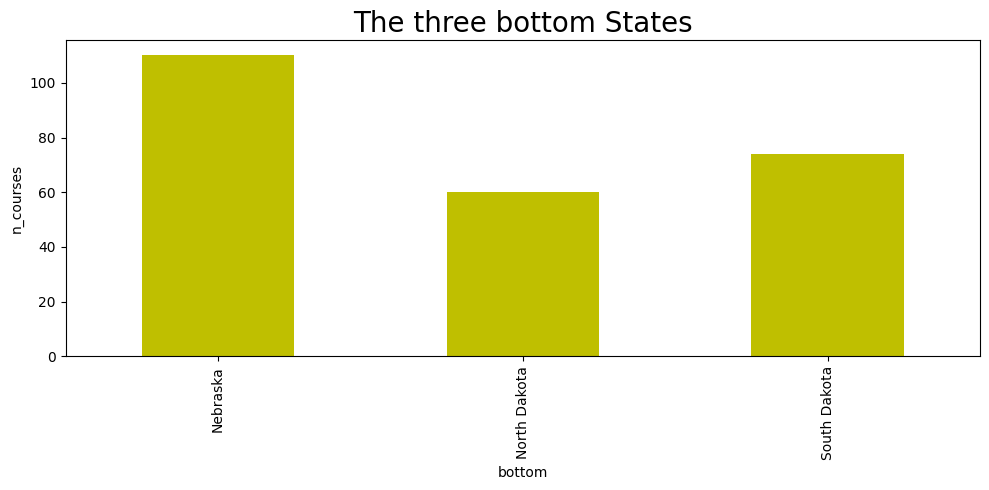

In [16]:
#Generate a bar plot showing Midwest and number of courses
#midwest_numb_courses =Midwest["state_x"].value_counts()
bottom.plot(x="state_x",y="n_courses",kind="bar", color="y",figsize=(10,5),legend=None)
#midwest_numb_courses.plot.bar(rot=0, x=Midwest,y= "n_courses")
plt.xlabel("bottom")
plt.xticks(rotation=90)
plt.ylabel("n_courses")
plt.title("The three bottom States",fontsize = 20)
plt.tight_layout()
#plt.show()
plt.savefig("Fig5.png")

# Average income in Midwest

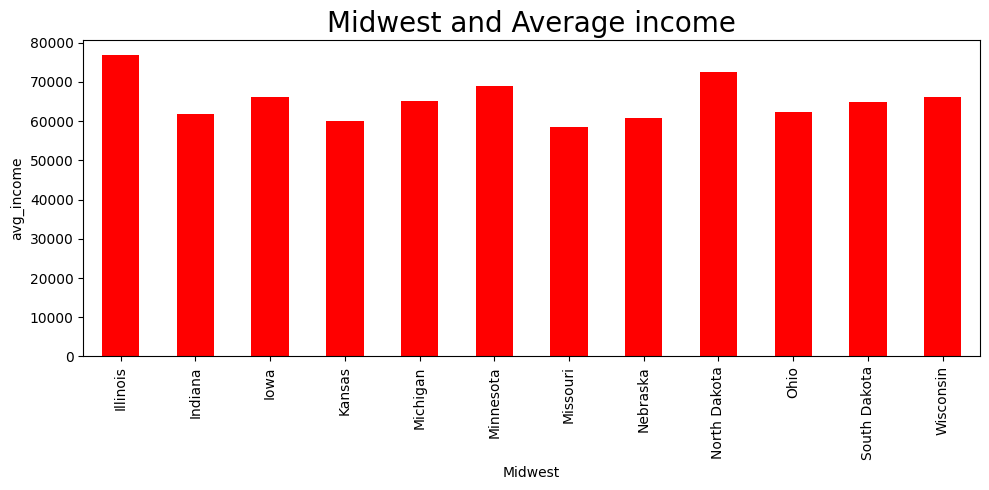

In [17]:
#Generate a bar plot showing Midwest and number of courses
#midwest_numb_courses =Midwest["state_x"].value_counts()
Midwest.plot(x="state_x",y="avg_income",kind="bar",figsize=(10,5),color="r",legend=None)
#midwest_numb_courses.plot.bar(rot=0, x=Midwest,y= "n_courses")
plt.xlabel("Midwest")
plt.xticks(rotation=90)
plt.ylabel("avg_income")
plt.title("Midwest and Average income",fontsize = 20)
plt.tight_layout()
#plt.show()
plt.savefig("Fig6.png")

In [18]:
# Sort the highest and display the top 3 rows.
top_ave_income=Midwest.sort_values("avg_income",ascending = False)
top_ave_income.head(3)


,state_x,total_pop,avg_income,n_courses,holeCount,rating
12,Illinois,2729860,76785.410580,285,12.610526,3.084746
33,North Dakota,479370,72439.367773,60,11.016667,3.714286
22,Minnesota,2365280,69054.948215,339,11.265487,3.093750


In [19]:
#filter top 3 States by average income from Midwet
top_ave = Midwest.loc[(Midwest["state_x"]=="Illinois")|(Midwest["state_x"]=="North Dakota")|(Midwest["state_x"]=="Minnesota")]
top_ave 

,state_x,total_pop,avg_income,n_courses,holeCount,rating
12,Illinois,2729860,76785.410580,285,12.610526,3.084746
22,Minnesota,2365280,69054.948215,339,11.265487,3.093750
33,North Dakota,479370,72439.367773,60,11.016667,3.714286


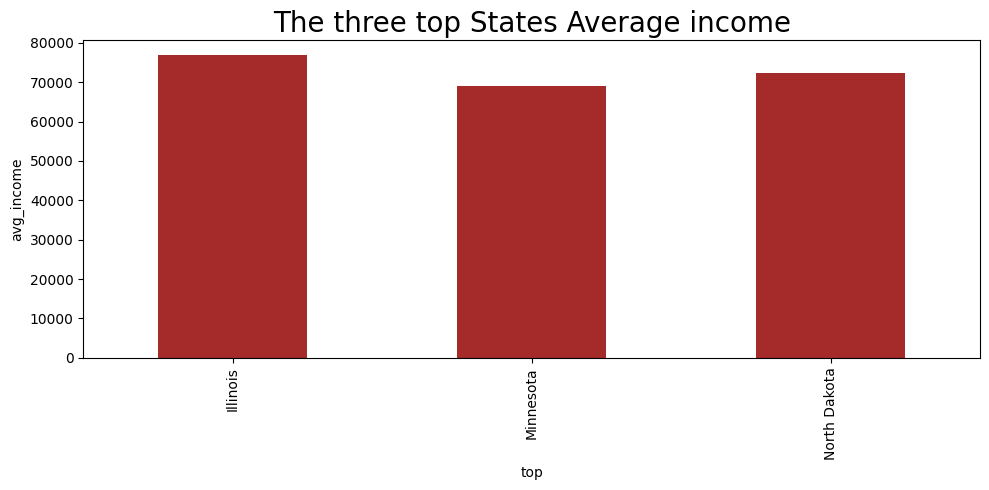

In [20]:
#Generate a bar plot showing Midwest and Average income
#midwest_average income=Midwest["state_x"].value_counts()
top_ave.plot(x="state_x",y="avg_income",kind="bar", color="brown",figsize=(10,5),legend=None)
#midwest_numb_courses.plot.bar(rot=0, x=Midwest,y= "n_courses")
plt.xlabel("top")
plt.xticks(rotation=90)
plt.ylabel("avg_income")
plt.title("The three top States Average income",fontsize = 20)
plt.tight_layout()
#plt.show()
plt.savefig("Fig7.png")


In [21]:
# Sort the lowest and display the top 3 rows.
bottom_ave_income=Midwest.sort_values("avg_income",ascending = True)
bottom_ave_income.head(3)

,state_x,total_pop,avg_income,n_courses,holeCount,rating
24,Missouri,1762390,58524.152347,185,13.875676,3.718310
15,Kansas,1440530,59990.129837,260,12.207692,3.370370
26,Nebraska,514590,60920.892644,110,10.736364,2.907407


In [22]:
#filter bottom 3 States by average income from Midwet
bottom_ave=Midwest.loc[(Midwest["state_x"]=="Missouri")|(Midwest["state_x"]=="Kansas")|(Midwest["state_x"]=="Nebraska")]
bottom_ave

,state_x,total_pop,avg_income,n_courses,holeCount,rating
15,Kansas,1440530,59990.129837,260,12.207692,3.370370
24,Missouri,1762390,58524.152347,185,13.875676,3.718310
26,Nebraska,514590,60920.892644,110,10.736364,2.907407


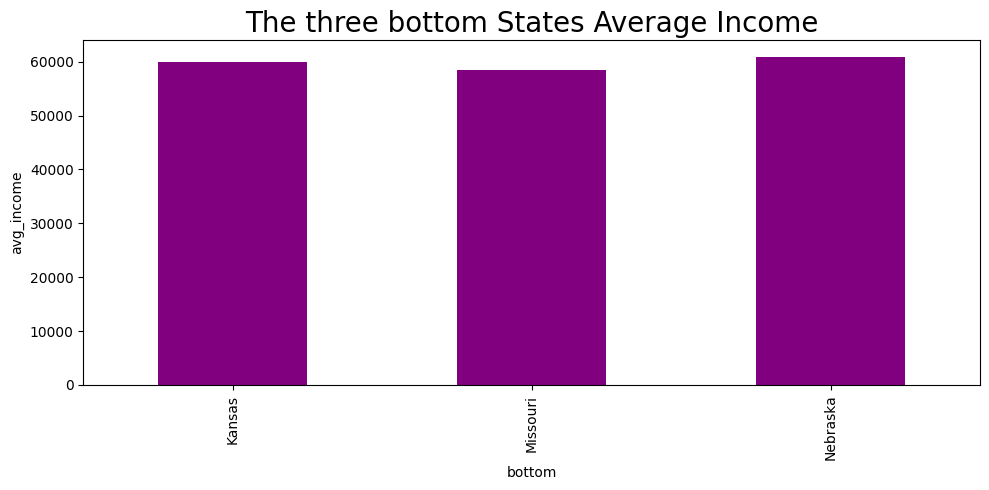

In [23]:
#Generate a bar plot showing Midwest and Average income
#midwest_average income=Midwest["state_x"].value_counts()
bottom_ave.plot(x="state_x",y="avg_income",kind="bar", color="purple",figsize=(10,5),legend=None)
#midwest_average income.plot.bar(rot=0, x=Midwest,y= "n_courses")
plt.xlabel("bottom")
plt.xticks(rotation=90)
plt.ylabel("avg_income")
plt.title("The three bottom States Average Income",fontsize = 20)
plt.tight_layout()
#plt.show()
plt.savefig("Fig8.png")


,state_x,total_pop,avg_income,n_courses,holeCount,rating
12,Illinois,2729860,76785.410580,285,12.610526,3.084746
13,Indiana,1901680,61940.266185,185,14.821622,3.526316
14,Iowa,1346220,66076.191609,287,11.668990,3.221053
15,Kansas,1440530,59990.129837,260,12.207692,3.370370
21,Michigan,2712540,65157.653139,300,15.246667,3.713043
22,Minnesota,2365280,69054.948215,339,11.265487,3.093750
24,Missouri,1762390,58524.152347,185,13.875676,3.718310
26,Nebraska,514590,60920.892644,110,10.736364,2.907407
33,North Dakota,479370,72439.367773,60,11.016667,3.714286
34,Ohio,2999610,62402.605148,261,13.762452,3.062937


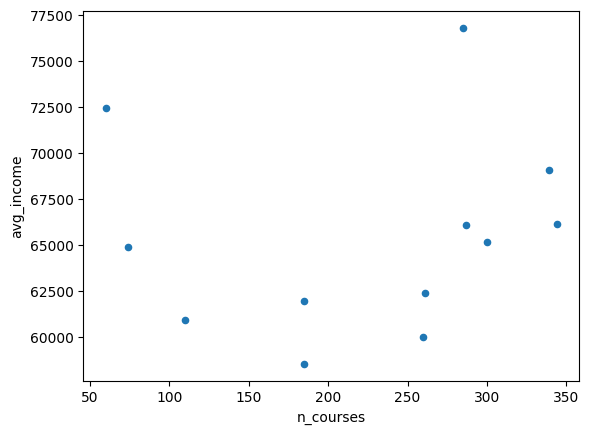

In [24]:
#Create a scatter plot to compare number of courses and average income
Midwest.plot.scatter(x = "n_courses",y = "avg_income")
Midwest

# Observation 

Minnesota overlaps both in top 3 states in terms of number of courses and average income.

Nebraska overlaps both in bottom 3 states in terms of number of courses and average income.	

Therefore, the pywear should spend their money in Minnesota	State.

# correlation coefficient and linear regression model 

The correlation between number of courses and the average income is 0.13.


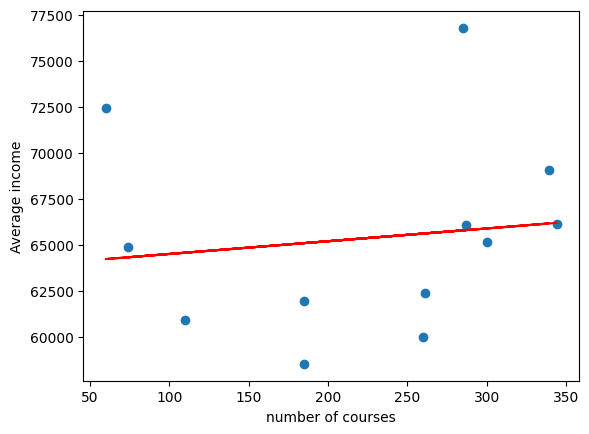

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for number of course and average income for Midwest
x_values= Midwest["n_courses"]
y_values= Midwest["avg_income"]
correlation= st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(300,300),fontsize=15,color="red")
plt.xlabel("number of courses")
plt.ylabel("Average income")
print(f"The correlation between number of courses and the average income is {round(correlation[0], 2)}.")
#plt.show()
#print(linear_plot(x_values,y_values))
plt.savefig("Fig9.png")

# Observation 

Having positive correlation of 0.13, r < 0.3 shows no or very weak correlation between number of courses and the average income. 